### Exploratory Data Analysis (EDA) - Credit Risk Modeling


This notebook explores customer behavioral and transaction data to identify patterns, assess data quality, and generate insights that will guide feature engineering for credit risk modeling.

### 1. Load Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os
sys.path.append(os.path.abspath(".."))

# Visualization settings
sns.set(style='whitegrid', palette='muted', font_scale=1.1)
pd.set_option('display.max_columns', None)

# Define the file path
file_path = "../data/raw/data.csv"

In [4]:
# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### 2. Overview of the Data

In [5]:
# Shape and basic info
print("Dataset Shape:", df.shape)
df.info()

# Data types
df.dtypes

# Unique values per column
df.nunique().sort_values()

Dataset Shape: (95662, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64

CountryCode                 1
CurrencyCode                1
FraudResult                 2
ChannelId                   4
PricingStrategy             4
ProviderId                  6
ProductCategory             9
ProductId                  23
Value                    1517
Amount                   1676
SubscriptionId           3627
AccountId                3633
CustomerId               3742
TransactionStartTime    94556
BatchId                 94809
TransactionId           95662
dtype: int64

### 3. Summary Statistics

In [6]:
# Descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


### 4. Identifying Missing Values

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

Series([], dtype: int64)

### 5. Duplicate Rows

In [8]:
# Count duplicate rows
df.duplicated().sum()

np.int64(0)

### 6. Distribution of Numerical Features

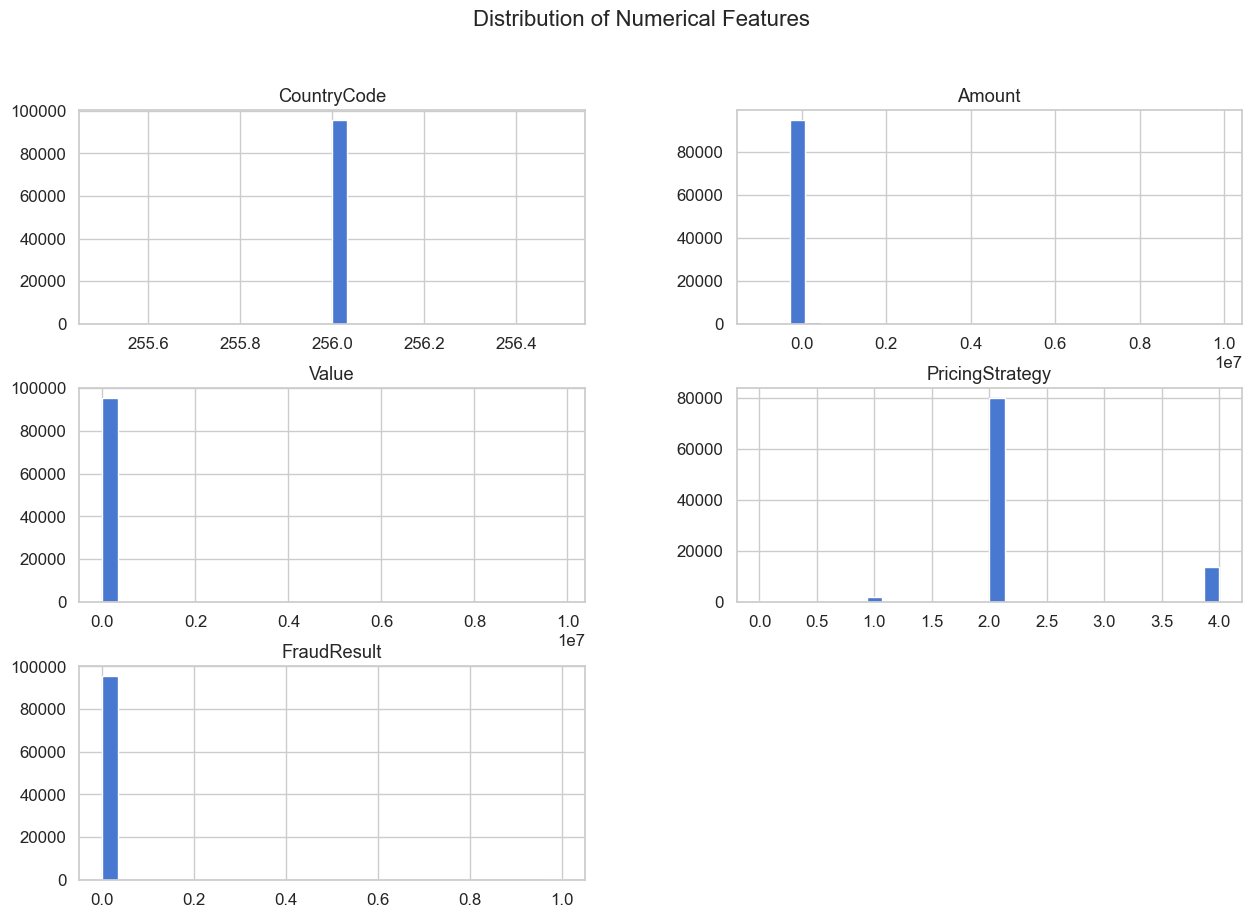

In [9]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Plot histograms
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

### 7. Distribution of Categorical Features

In [ ]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Plot bar charts for categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 8. Correlation Analysis


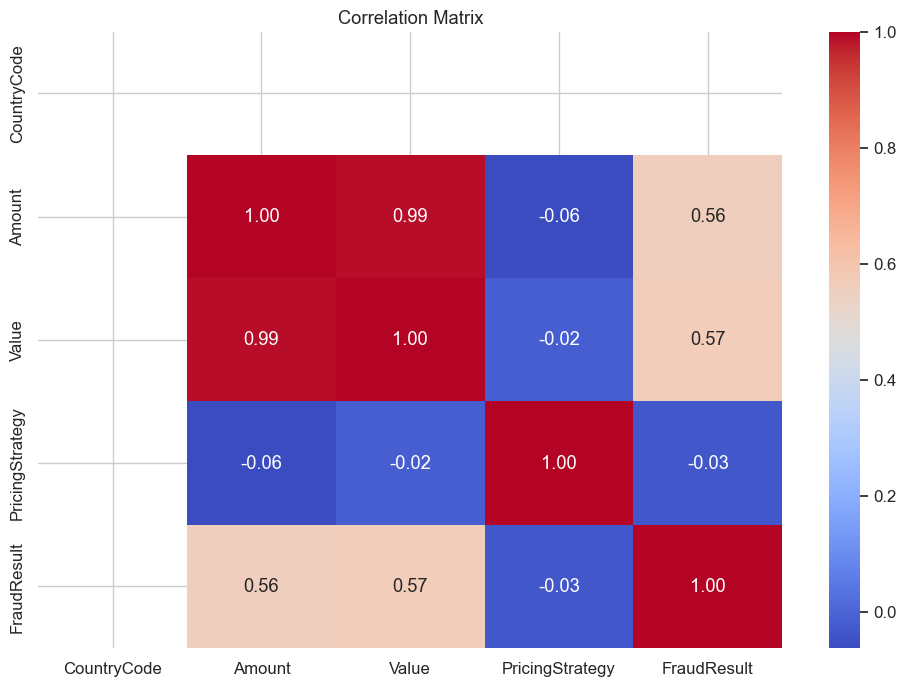

In [10]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 9. Outlier Detection

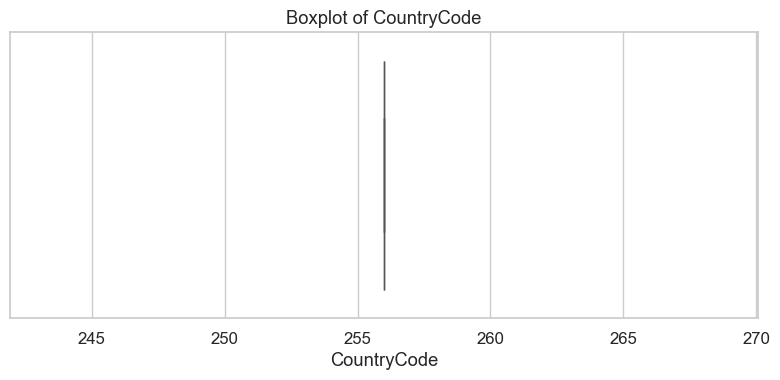

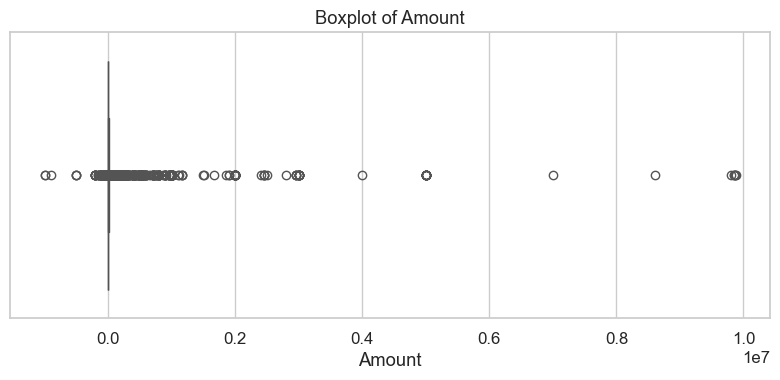

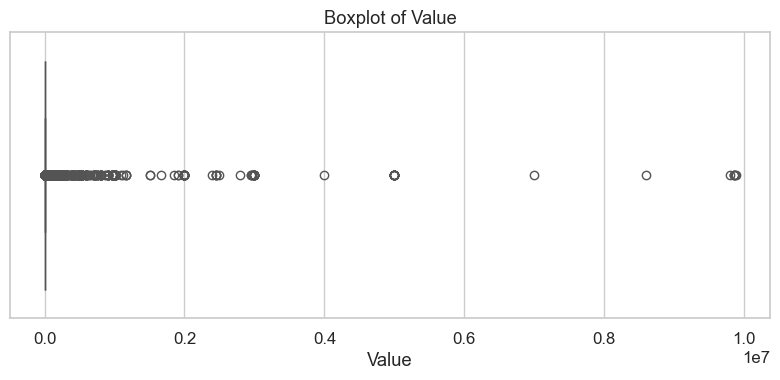

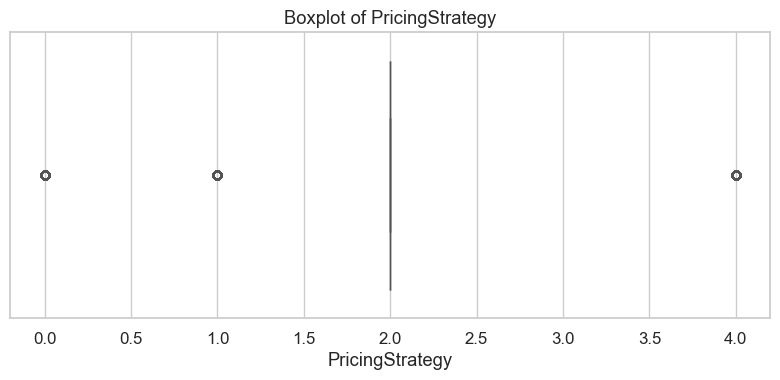

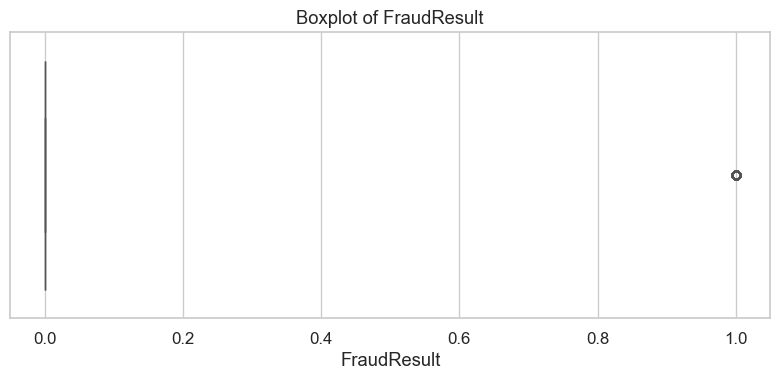

In [11]:
# Boxplots for numerical features
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()